# GENERATING NECESSARY LIBRARY AND IMPORTING LIB

In [4]:
import sys
import os
from pathlib import Path
import pandas as pd

# Add the src folder to the Python path so we can import it
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Now we can import the scripts from src/
from data_cleaning import clean_data, flatten_instagram_json
from engagement_metrics import calculate_engagement_metrics, aggregate_engagement_by_month
from analysis import analyze_engagement_by_time, analyze_engagement_by_content_type
from visualize import plot_monthly_engagement, plot_engagement_rate
from enrichment import load_insights_posts, merge_posts_with_insights
from segmentation_analysis import analyze_content_performance_by_type, segment_by_engagement
#from content_type_analysis import categorize_image_content
from predictive_modeling import predict_engagement
from datetime import datetime, timedelta, timezone

ROOT = Path(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis")

# Data cleaning and processing

In [5]:
posts_file = list(ROOT.rglob("your_instagram_activity/media/posts_1.json"))
assert posts_file, "Couldn't find posts JSON. Check your path."
posts_df = flatten_instagram_json(posts_file[0])

posts_df = clean_data(posts_df)
posts_df

c:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\src\data_cleaning.py:108: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["creation_month"] = df["creation_timestamp"].dt.to_period("M")


,uri,creation_timestamp,title,top_creation_timestamp,top_title,dubbing_info,media_variants,product_tags,media_metadata.camera_metadata.has_camera_metadata,cross_post_source.source_app,creation_date,creation_month,top_creation_date
0,media/other/18005202119701873.jpg,2024-12-30 21:00:47+07:00,Cousin Itt.,NaT,,NaN,NaN,NaN,False,FB,2024-12-30,2024-12,NaT
1,media/other/18067352005700577.jpg,2024-12-28 21:01:00+07:00,10/100 does not equal 1/10.,NaT,,NaN,NaN,NaN,False,FB,2024-12-28,2024-12,NaT
2,media/other/18045234064965601.jpg,2024-12-26 20:00:44+07:00,An old sport.,NaT,,NaN,NaN,NaN,False,FB,2024-12-26,2024-12,NaT
3,media/posts/202412/18021149483636820.jpg,2024-12-25 10:00:39+07:00,,2024-12-25 10:00:39+07:00,Oh itâs Christmas.,NaN,NaN,NaN,False,FB,2024-12-25,2024-12,2024-12-25
4,media/posts/202412/18108260365453441.jpg,2024-12-25 10:00:39+07:00,,2024-12-25 10:00:39+07:00,Oh itâs Christmas.,NaN,NaN,NaN,False,FB,2024-12-25,2024-12,2024-12-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,media/other/18046705567622074.jpg,2024-03-08 20:02:36+07:00,From the fissure.,NaT,,NaN,NaN,NaN,False,FB,2024-03-08,2024-03,NaT
315,media/other/18070344352483188.jpg,2024-03-08 20:02:09+07:00,Venus front and back.,NaT,,NaN,NaN,NaN,False,FB,2024-03-08,2024-03,NaT
316,media/posts/202403/17974930991527885.jpg,2024-03-08 20:01:45+07:00,,2024-03-08 20:01:46+07:00,Coming into focus.,NaN,NaN,NaN,False,FB,2024-03-08,2024-03,2024-03-08
317,media/posts/202403/18007659062117439.jpg,2024-03-08 20:01:45+07:00,,2024-03-08 20:01:46+07:00,Coming into focus.,NaN,NaN,NaN,False,FB,2024-03-08,2024-03,2024-03-08


In [6]:
insights_df = load_insights_posts(ROOT)
insights_df.head()


,uri,creation_timestamp,title,likes,comments,reach,impressions,saves,shares,profile_visits,follows
0,media/other/18005202119701873.jpg,1735567247,Cousin Itt.,42,0,926,1047,5,2,4,0
1,media/other/18067352005700577.jpg,1735394460,10/100 does not equal 1/10.,37,0,1016,1108,2,1,7,1
2,media/other/18045234064965601.jpg,1735218044,An old sport.,26,0,639,698,2,0,5,0
3,media/other/17850460545325482.jpg,1735052452,Controlling the view.,57,0,1154,1266,2,0,16,0
4,media/other/18365546479137722.jpg,1734966056,What a do.,47,1,737,805,2,1,7,0


In [7]:
insights_df.dtypes


uri                   object
creation_timestamp     int64
title                 object
likes                  int64
comments               int64
reach                  int64
impressions            int64
saves                  int64
shares                 int64
profile_visits         int64
follows                int64
dtype: object

In [8]:
insights_df.shape

(205, 11)

In [9]:
posts_file = list(ROOT.rglob("your_instagram_activity/media/posts_1.json"))[0]
posts_df = clean_data(flatten_instagram_json(posts_file))

c:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\src\data_cleaning.py:108: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["creation_month"] = df["creation_timestamp"].dt.to_period("M")


In [10]:
# Asia/Jakarta timezone
LOCAL_TZ = timezone(timedelta(hours=7))

if insights_df["creation_timestamp"].dtype != "datetime64[ns, UTC+07:00]":
    insights_df["creation_timestamp"] = pd.to_datetime(
        insights_df["creation_timestamp"], unit="s", utc=True
    ).dt.tz_convert(LOCAL_TZ)


In [35]:
# merge
posts_enriched = posts_df.merge(
    insights_df,
    how="left",
    on=["uri","creation_timestamp","title"],  # best-case match
)
# Fallback: fill NaNs
for c in ["likes","comments","reach","impressions","saves","shares"]:
    if c not in posts_enriched.columns:
        posts_enriched[c] = 0
    posts_enriched[c] = pd.to_numeric(posts_enriched[c], errors="coerce").fillna(0)

# metrics
posts_enriched = calculate_engagement_metrics(posts_enriched)
posts_enriched
#posts_enriched.to_csv(r"C:\Users\stefa\Documents\Codes\CarinaHardy-Instagram-Data-Analysis\insta-Project\data\source_data\processed\posts_enriched.csv", index=False)

,uri,creation_timestamp,title,top_creation_timestamp,top_title,dubbing_info,media_variants,product_tags,media_metadata.camera_metadata.has_camera_metadata,cross_post_source.source_app,...,comments,reach,impressions,saves,shares,profile_visits,follows,followers_count,engagement,engagement_rate
0,media/other/18005202119701873.jpg,2024-12-30 21:00:47+07:00,Cousin Itt.,NaT,,NaN,NaN,NaN,False,FB,...,0.0,926.0,1047.0,5.0,2.0,4.0,0.0,1000,42.0,0.042
1,media/other/18067352005700577.jpg,2024-12-28 21:01:00+07:00,10/100 does not equal 1/10.,NaT,,NaN,NaN,NaN,False,FB,...,0.0,1016.0,1108.0,2.0,1.0,7.0,1.0,1000,37.0,0.037
2,media/other/18045234064965601.jpg,2024-12-26 20:00:44+07:00,An old sport.,NaT,,NaN,NaN,NaN,False,FB,...,0.0,639.0,698.0,2.0,0.0,5.0,0.0,1000,26.0,0.026
3,media/posts/202412/18021149483636820.jpg,2024-12-25 10:00:39+07:00,,2024-12-25 10:00:39+07:00,Oh itâs Christmas.,NaN,NaN,NaN,False,FB,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1000,0.0,0.000
4,media/posts/202412/18108260365453441.jpg,2024-12-25 10:00:39+07:00,,2024-12-25 10:00:39+07:00,Oh itâs Christmas.,NaN,NaN,NaN,False,FB,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,media/other/18046705567622074.jpg,2024-03-08 20:02:36+07:00,From the fissure.,NaT,,NaN,NaN,NaN,False,FB,...,7.0,1796.0,2273.0,7.0,4.0,51.0,0.0,1000,135.0,0.135
315,media/other/18070344352483188.jpg,2024-03-08 20:02:09+07:00,Venus front and back.,NaT,,NaN,NaN,NaN,False,FB,...,6.0,2591.0,3040.0,7.0,4.0,50.0,1.0,1000,126.0,0.126
316,media/posts/202403/17974930991527885.jpg,2024-03-08 20:01:45+07:00,,2024-03-08 20:01:46+07:00,Coming into focus.,NaN,NaN,NaN,False,FB,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1000,0.0,0.000
317,media/posts/202403/18007659062117439.jpg,2024-03-08 20:01:45+07:00,,2024-03-08 20:01:46+07:00,Coming into focus.,NaN,NaN,NaN,False,FB,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1000,0.0,0.000


# Analysis starts from here

### Posting Cadence and Trends

C:\Users\stefa\AppData\Local\Temp\ipykernel_25472\1202712746.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly["month"] = monthly["creation_timestamp"].dt.to_period("M")


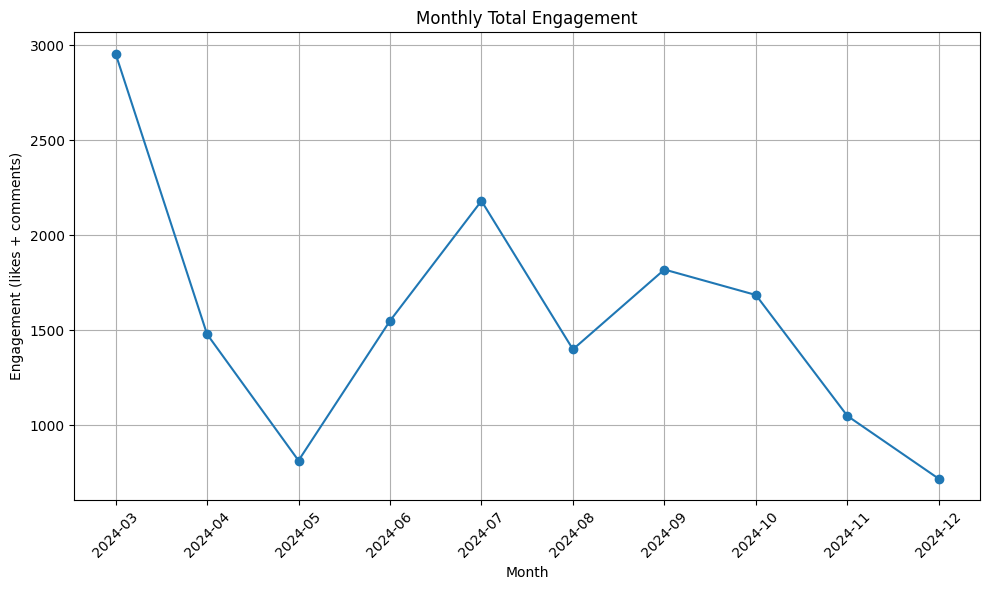

In [13]:
import matplotlib.pyplot as plt

# Aggregate engagement metrics by month
monthly = posts_enriched.copy()
monthly["month"] = monthly["creation_timestamp"].dt.to_period("M")
monthly = (
    monthly.groupby("month")[["likes", "comments", "reach", "impressions", "engagement"]]
    .sum()
    .reset_index()
)
monthly["month"] = monthly["month"].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly["month"], monthly["engagement"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Total Engagement")
plt.xlabel("Month")
plt.ylabel("Engagement (likes + comments)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Engagement by Time of Day / Day of Week

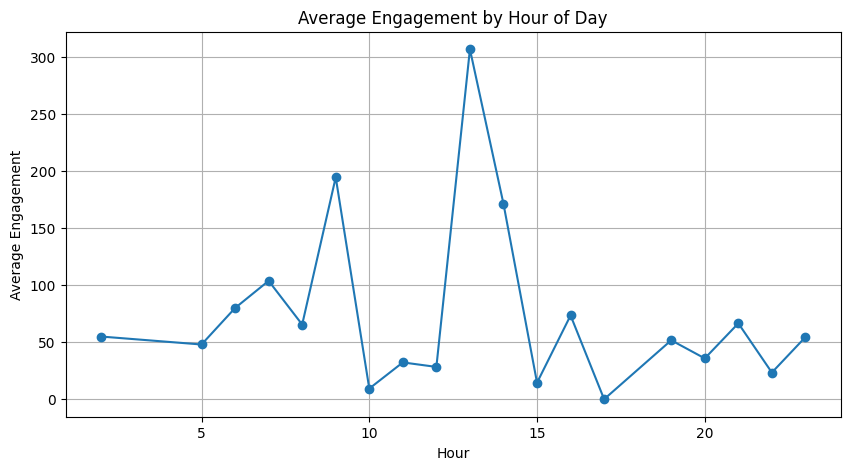

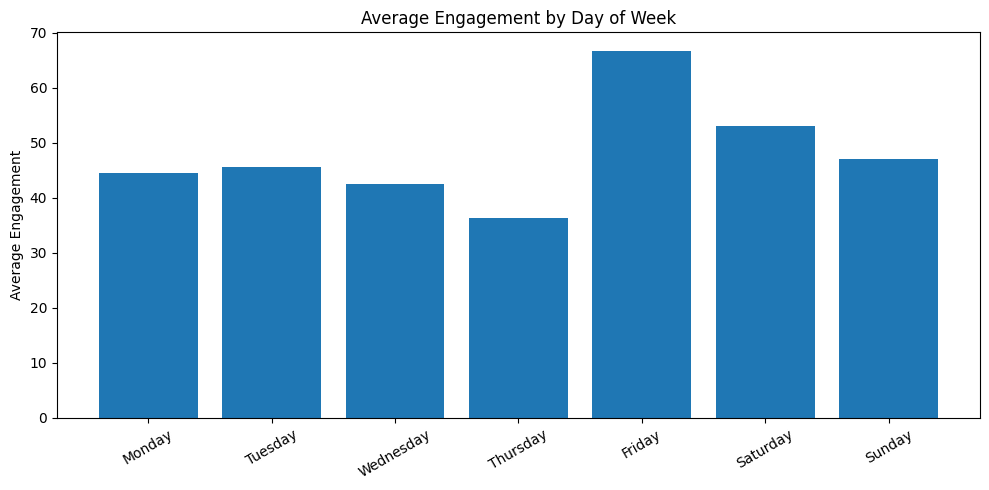

In [14]:
# Extract hour and weekday
posts_enriched["hour"] = posts_enriched["creation_timestamp"].dt.hour
posts_enriched["weekday"] = posts_enriched["creation_timestamp"].dt.day_name()

# Average engagement per hour
hourly = posts_enriched.groupby("hour")["engagement"].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(hourly["hour"], hourly["engagement"], marker="o")
plt.title("Average Engagement by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Engagement")
plt.grid(True)
plt.show()

# Average engagement per weekday
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday = (
    posts_enriched.groupby("weekday")["engagement"]
    .mean()
    .reindex(weekday_order)
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.bar(weekday["weekday"], weekday["engagement"])
plt.title("Average Engagement by Day of Week")
plt.xticks(rotation=30)
plt.ylabel("Average Engagement")
plt.tight_layout()
plt.show()


### Engagement Efficiency
#### Which posts were punching above their weight ex:maybe a reel that reached fewer people but got a huge like rate.

In [15]:
posts_enriched["like_rate"] = (posts_enriched["likes"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)
posts_enriched["comment_rate"] = (posts_enriched["comments"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)
posts_enriched["save_rate"] = (posts_enriched["saves"] / posts_enriched["reach"]).replace([float("inf"), -float("inf")], 0)

efficiency = posts_enriched[["title", "reach", "likes", "comments", "saves", "like_rate", "comment_rate", "save_rate"]]
efficiency.sort_values(by="like_rate", ascending=False).head(10)


,title,reach,likes,comments,saves,like_rate,comment_rate,save_rate
87,Namesake.,1410.0,167.0,9.0,1.0,0.118440,0.006383,0.000709
205,Motion in stillness.,2648.0,312.0,6.0,35.0,0.117825,0.002266,0.013218
123,Playing dress down.,1815.0,202.0,7.0,5.0,0.111295,0.003857,0.002755
107,Devotional rapture.,2921.0,302.0,5.0,29.0,0.103389,0.001712,0.009928
183,"____, can I post this?",2670.0,274.0,7.0,24.0,0.102622,0.002622,0.008989
103,"Carina, Carina â¦ â¦. â¦. â¦.",1588.0,157.0,7.0,6.0,0.098866,0.004408,0.003778
79,Everything we do is in the name of love.,2570.0,254.0,18.0,6.0,0.098833,0.007004,0.002335
135,Cannon balls.,2038.0,200.0,7.0,11.0,0.098135,0.003435,0.005397
288,Venus surrounded by eggs.,840.0,81.0,1.0,2.0,0.096429,0.001190,0.002381
96,Teasing perception.,990.0,93.0,2.0,6.0,0.093939,0.002020,0.006061


### High-Performing Content

In [16]:
top_posts = posts_enriched.sort_values(by="engagement_rate", ascending=False).head(10)
top_posts[["uri","title", "likes", "comments", "reach", "impressions", "engagement_rate"]]

,uri,title,likes,comments,reach,impressions,engagement_rate
181,media/other/17936217308853227.jpg,Topography of a tango.,464.0,4.0,22855.0,32764.0,0.468
318,media/other/17948526479776599.jpg,Bite test. Tastes recycled.,426.0,18.0,27530.0,48572.0,0.444
213,media/other/18048633694666140.jpg,99 out of a 100 donât make it.,381.0,22.0,25455.0,42099.0,0.403
182,media/other/18450965923058024.jpg,The Chosen One.,312.0,11.0,16793.0,31709.0,0.323
205,media/other/18031969951851726.jpg,Motion in stillness.,312.0,6.0,2648.0,3024.0,0.318
107,media/other/17889103545095709.jpg,Devotional rapture.,302.0,5.0,2921.0,3156.0,0.307
313,media/other/18079893457443261.jpg,Hold on. \nHere we go.,287.0,18.0,15546.0,26749.0,0.305
295,media/other/18023821175041365.jpg,Accent curves and colors.,287.0,6.0,3250.0,3706.0,0.293
183,media/other/18040563178900075.jpg,"____, can I post this?",274.0,7.0,2670.0,3028.0,0.281
79,media/other/17928717605848607.jpg,Everything we do is in the name of love.,254.0,18.0,2570.0,2848.0,0.272


### Performance Category

In [17]:
def label_performance(rate):
    if rate >= posts_enriched["engagement_rate"].quantile(0.75):
        return "Quantile 0.75"
    elif rate >= posts_enriched["engagement_rate"].quantile(0.25):
        return "Quantile 0.25"
    else:
        return "Low"

posts_enriched["performance_label"] = posts_enriched["engagement_rate"].apply(label_performance)
posts_enriched["performance_label"].value_counts()


performance_label
Quantile 0.25    236
Quantile 0.75     83
Name: count, dtype: int64

C:\Users\stefa\AppData\Local\Temp\ipykernel_25472\2841894699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_posts['log_engagement_rate'] = np.log(filtered_posts['engagement_rate'] + 1)


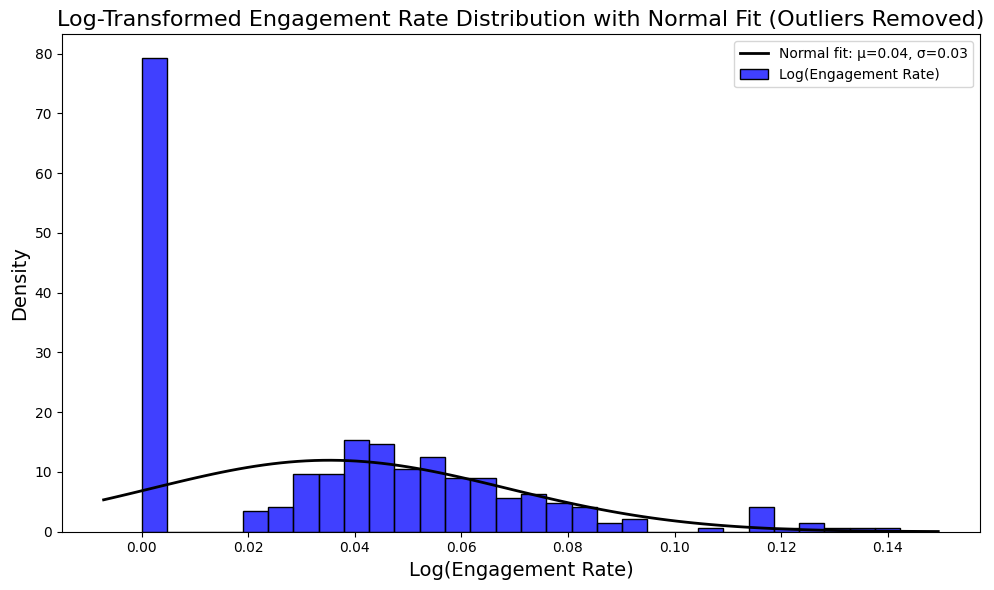

In [31]:
# Remove posts with extremely high engagement rates (outliers)
threshold = posts_enriched['engagement_rate'].quantile(0.95)  # Choose a high quantile for removal
filtered_posts = posts_enriched[posts_enriched['engagement_rate'] < threshold]

# Apply log transformation to the filtered data
filtered_posts['log_engagement_rate'] = np.log(filtered_posts['engagement_rate'] + 1)

# Plot again with the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_posts['log_engagement_rate'], bins=30, kde=False, color='blue', stat='density', label='Log(Engagement Rate)')

# Fit a normal distribution to the log-transformed data
mu, std = norm.fit(filtered_posts['log_engagement_rate'].dropna())

# Plot the normal distribution fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal fit: μ={mu:.2f}, σ={std:.2f}')

# Add titles and labels
plt.title('Log-Transformed Engagement Rate Distribution with Normal Fit (Outliers Removed)', fontsize=16)
plt.xlabel('Log(Engagement Rate)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [32]:
def label_performance_log(rate):
    if rate >= posts_enriched['log_engagement_rate'].quantile(0.75):
        return "High"
    elif rate >= posts_enriched['log_engagement_rate'].quantile(0.25):
        return "Medium"
    else:
        return "Low"

posts_enriched["performance_label_log"] = posts_enriched["log_engagement_rate"].apply(label_performance_log)


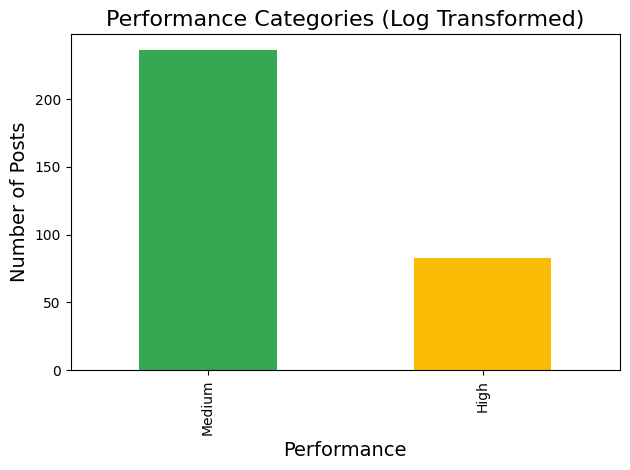

In [33]:
# Plot the performance categories after log transformation
posts_enriched["performance_label_log"].value_counts().plot(kind='bar', color=['#34a853', '#fbbc05', '#ea4335'])
plt.title("Performance Categories (Log Transformed)", fontsize=16)
plt.ylabel('Number of Posts', fontsize=14)
plt.xlabel('Performance', fontsize=14)
plt.tight_layout()
plt.show()


In [37]:
posts_enriched.columns

Index(['uri', 'creation_timestamp', 'title', 'top_creation_timestamp',
       'top_title', 'dubbing_info', 'media_variants', 'product_tags',
       'media_metadata.camera_metadata.has_camera_metadata',
       'cross_post_source.source_app', 'creation_date', 'creation_month',
       'top_creation_date', 'likes', 'comments', 'reach', 'impressions',
       'saves', 'shares', 'profile_visits', 'follows', 'followers_count',
       'engagement', 'engagement_rate'],
      dtype='object')

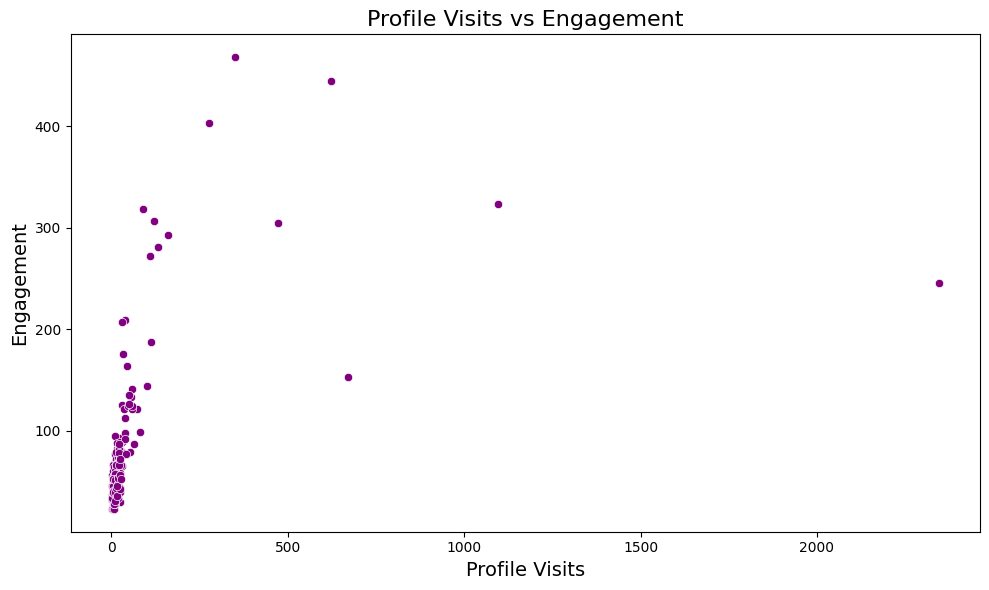

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_enriched["profile_visits"], y=posts_enriched["engagement"], color="purple")
plt.title("Profile Visits vs Engagement", fontsize=16)
plt.xlabel("Profile Visits", fontsize=14)
plt.ylabel("Engagement", fontsize=14)
plt.tight_layout()
plt.show()


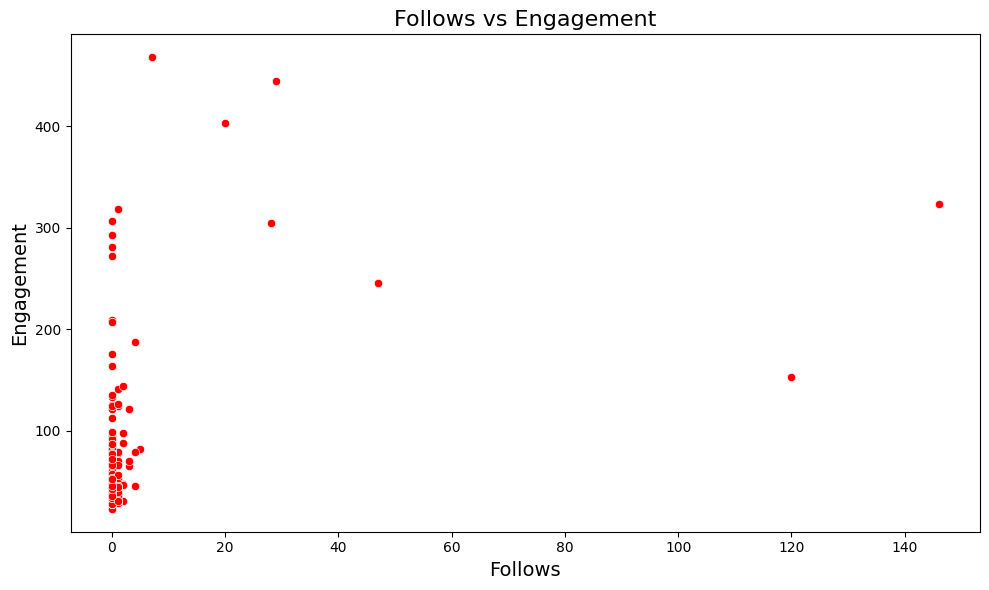

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_enriched["follows"], y=posts_enriched["engagement"], color="red")
plt.title("Follows vs Engagement", fontsize=16)
plt.xlabel("Follows", fontsize=14)
plt.ylabel("Engagement", fontsize=14)
plt.tight_layout()
plt.show()


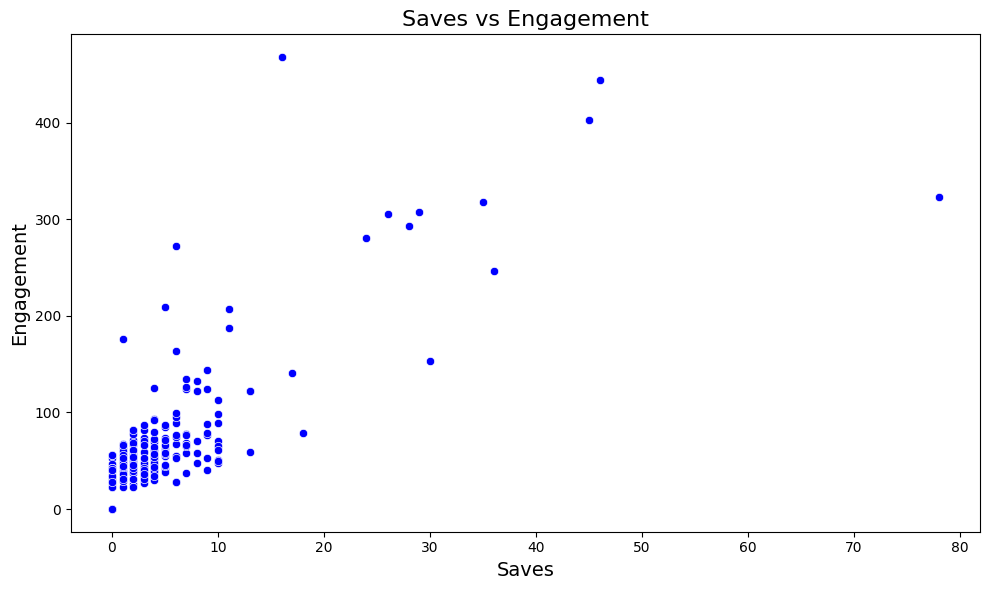

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=posts_enriched["saves"], y=posts_enriched["engagement"], color="blue")
plt.title("Saves vs Engagement", fontsize=16)
plt.xlabel("Saves", fontsize=14)
plt.ylabel("Engagement", fontsize=14)
plt.tight_layout()
plt.show()


In [44]:
# Create a performance segmentation based on log engagement rate
def label_performance(rate):
    if rate >= posts_enriched["log_engagement_rate"].quantile(0.75):
        return "High"
    elif rate >= posts_enriched["log_engagement_rate"].quantile(0.25):
        return "Medium"
    else:
        return "Low"

posts_enriched["performance_label"] = posts_enriched["log_engagement_rate"].apply(label_performance)

# Check the performance distribution
performance_counts = posts_enriched["performance_label"].value_counts()
performance_counts.plot(kind="bar", color=['#34a853', '#fbbc05', '#ea4335'])
plt.title("Performance Segmentation (High, Medium, Low)", fontsize=16)
plt.xlabel("Performance Category", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.tight_layout()
plt.show()


KeyError: 'log_engagement_rate'

# Content Type Analysis

In [ ]:
posts_df.columns

In [ ]:
from content_type_analysis import categorize_image_content

# Apply categorization to classify images
posts_df = categorize_image_content(posts_df)

# Check if the 'aspect_ratio' column exists
print(posts_df[['aspect_ratio', 'content_type']].head())

# Check if it worked:
# Check how many posts are of each content type (Image vs. Video)
posts_df['content_type'].value_counts()


In [ ]:
from content_type_analysis import categorize_image_content

# Classify images in posts_df based on their content attributes
posts_df = categorize_image_content(posts_df)

# Check the new 'content_type' and other categories
posts_df['content_type'].value_counts()  # Check how many posts are images vs. videos
posts_df[['contains_people', 'contains_jewelry']].head()  # Check if people/jewelry classification is working


In [ ]:
from segmentation_analysis import analyze_content_performance_by_type

# Analyze content performance based on content type
analyze_content_performance_by_type(posts_df)

# Segment the posts based on engagement and content type
from segmentation_analysis import segment_by_engagement

segment_by_engagement(posts_df)


In [ ]:
from predictive_modeling import predict_engagement

predict_engagement(posts_df)
